In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***A: Implementation of models***

## **LVL 1 - Data preparation**

### Data loading and Feature selection

In [ ]:
import pandas as pd
import numpy as np

data_path = '/content/drive/MyDrive/AI_HW5/CMAPSS/'

#نام ستون‌ها
op_settings = ['op_setting_1', 'op_setting_2', 'op_setting_3']
sensors = ['sensor_{}'.format(i) for i in range(1, 22)]
cols = ['unit_nr', 'cycle'] + op_settings + sensors

#  بارگذاری داده‌های آموزشی و آزمون
# ممکن است read_csv دو ستون خالی در انتها ایجاد کند که آن‌ها را حذف می‌کنیم
train_df = pd.read_csv(data_path + 'train_FD001.txt', sep=' ', header=None)
train_df.drop(columns=[26, 27], inplace=True)
train_df.columns = cols

test_df = pd.read_csv(data_path + 'test_FD001.txt', sep=' ', header=None)
test_df.drop(columns=[26, 27], inplace=True)
test_df.columns = cols

# بارگذاری داده‌های RUL برای مجموعه آزمون
rul_df = pd.read_csv(data_path + 'RUL_FD001.txt', sep=' ', header=None)
rul_df.drop(columns=[1], inplace=True)
rul_df.columns = ['RUL']

In [ ]:
print("داده‌های آموزشی:")
display(train_df.head())

print("\nداده‌های آزمون:")
display(test_df.head())

print("\nداده‌های RUL واقعی برای آزمون:")
display(rul_df.head())

داده‌های آموزشی:


,unit_nr,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044



داده‌های آزمون:


,unit_nr,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130



داده‌های RUL واقعی برای آزمون:


,RUL
0,112
1,98
2,69
3,82
4,91


In [ ]:
# محاسبه انحراف معیار برای داده‌های آموزشی
feature_std = train_df.std()

print("انحراف معیار برای هر ویژگی:")
print(feature_std)

انحراف معیار برای هر ویژگی:
unit_nr         2.922763e+01
cycle           6.888099e+01
op_setting_1    2.187313e-03
op_setting_2    2.930621e-04
op_setting_3    0.000000e+00
sensor_1        6.537152e-11
sensor_2        5.000533e-01
sensor_3        6.131150e+00
sensor_4        9.000605e+00
sensor_5        3.394700e-12
sensor_6        1.388985e-03
sensor_7        8.850923e-01
sensor_8        7.098548e-02
sensor_9        2.208288e+01
sensor_10       4.660829e-13
sensor_11       2.670874e-01
sensor_12       7.375534e-01
sensor_13       7.191892e-02
sensor_14       1.907618e+01
sensor_15       3.750504e-02
sensor_16       1.556432e-14
sensor_17       1.548763e+00
sensor_18       0.000000e+00
sensor_19       0.000000e+00
sensor_20       1.807464e-01
sensor_21       1.082509e-01
dtype: float64


In [ ]:
# تعریف لیستی از ستون‌هایی که باید حذف شوند
cols_to_drop = ['op_setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']

# حذف ستون‌ها از دیتافریم آموزشی و آزمون
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

print("ستون‌های باقی‌مانده در دیتافریم آموزشی:")
print(train_df.columns)

ستون‌های باقی‌مانده در دیتافریم آموزشی:
Index(['unit_nr', 'cycle', 'op_setting_1', 'op_setting_2', 'sensor_2',
       'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_17', 'sensor_20', 'sensor_21'],
      dtype='object')


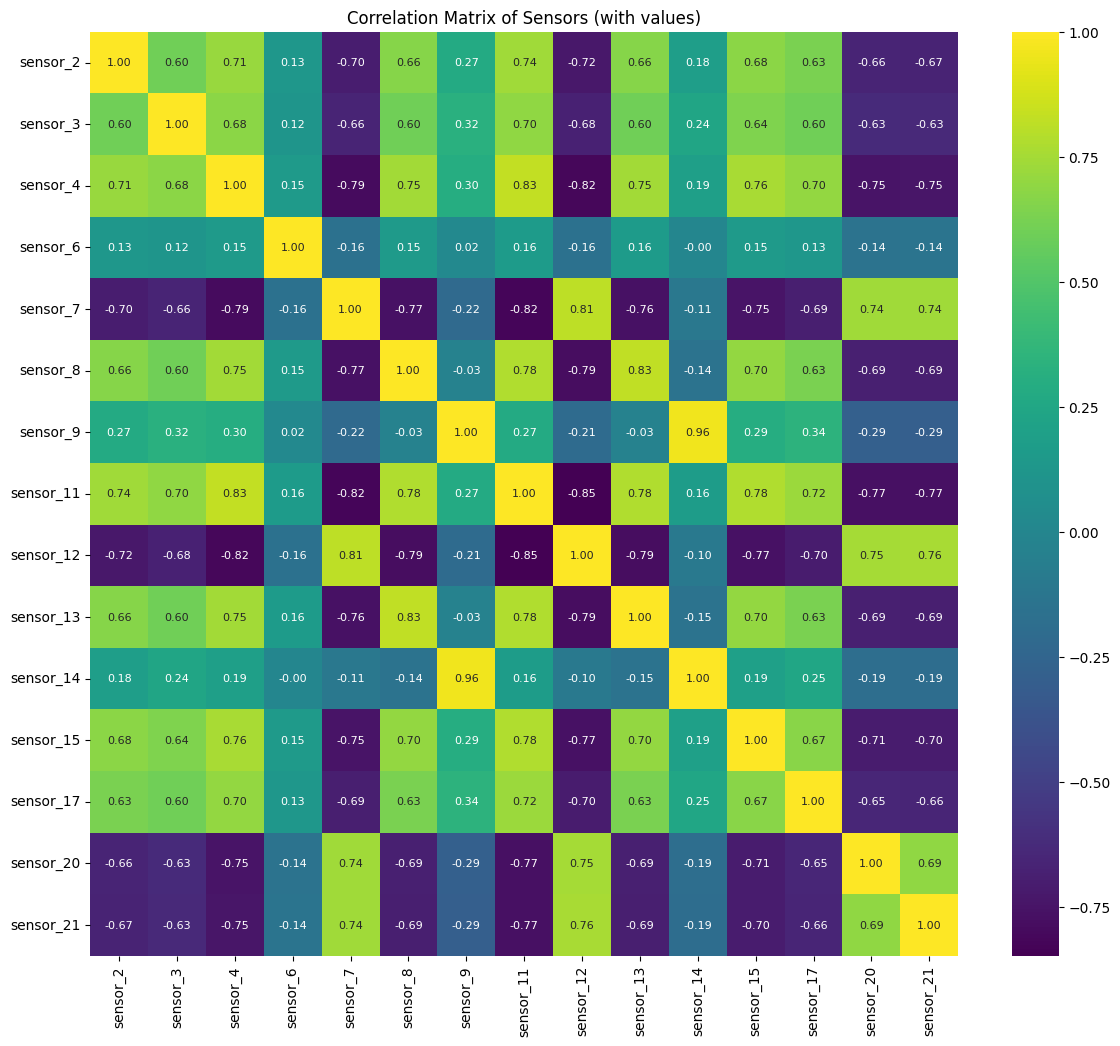

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# محاسبه ماتریس همبستگی برای ستون‌های باقی‌مانده سنسورها
sensor_cols = [col for col in train_df.columns if 'sensor' in col]
corr_matrix = train_df[sensor_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', annot_kws={"size": 8})
plt.title('Correlation Matrix of Sensors (with values)')
plt.show()

In [ ]:
# حذف ستون sensor_14 به دلیل همبستگی بالا با sensor_9
train_df.drop(columns=['sensor_14'], inplace=True)
test_df.drop(columns=['sensor_14'], inplace=True)

print("تعداد ویژگی‌های باقی‌مانده:", len(train_df.columns))

تعداد ویژگی‌های باقی‌مانده: 18


In [ ]:
# پیدا کردن آخرین چرخه (عمر کل) برای هر موتور
max_cycles = train_df.groupby('unit_nr')['cycle'].max().reset_index()
max_cycles.columns = ['unit_nr', 'max_cycle']

# ادغام این اطلاعات در دیتافریم آموزشی اصلی
train_df = pd.merge(train_df, max_cycles, on='unit_nr', how='left')

# محاسبه و ایجاد ستون RUL
train_df['RUL'] = train_df['max_cycle'] - train_df['cycle']

# حذف ستون کمکی max_cycle
train_df.drop(columns=['max_cycle'], inplace=True)

# نمایش چند سطر اول برای بررسی ستون جدید RUL
print("نمایش داده‌های آموزشی با ستون RUL:")
display(train_df[['unit_nr', 'cycle', 'RUL']].head())

نمایش داده‌های آموزشی با ستون RUL:


,unit_nr,cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


همبستگی هر ویژگی با RUL (مرتب‌شده بر اساس قدر مطلق):
sensor_11       0.696228
sensor_4        0.678948
sensor_12       0.671983
sensor_7        0.657223
sensor_15       0.642667
sensor_21       0.635662
sensor_20       0.629428
sensor_2        0.606484
sensor_17       0.606154
sensor_3        0.584520
sensor_8        0.563968
sensor_13       0.562569
sensor_9        0.390102
sensor_6        0.128348
op_setting_1    0.003198
op_setting_2    0.001948
Name: RUL, dtype: float64


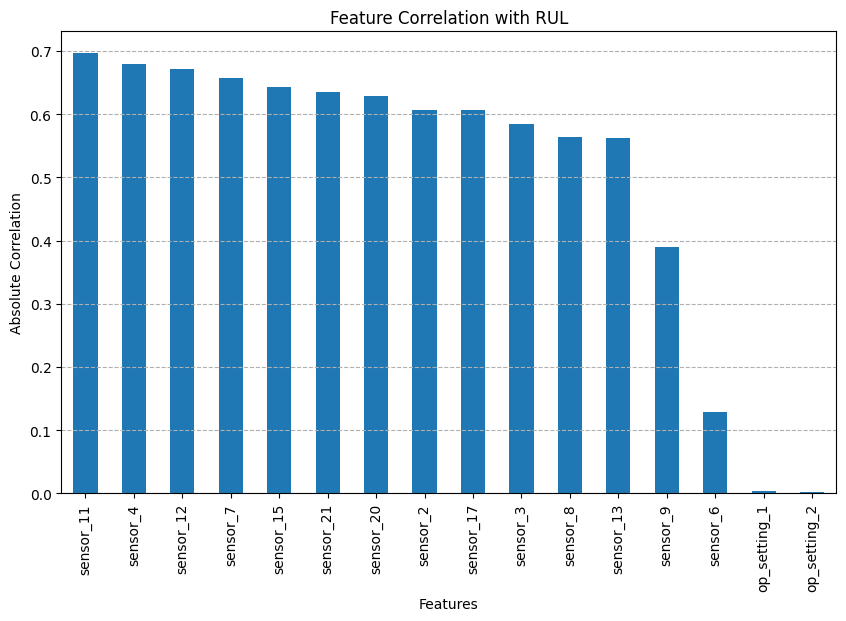

In [ ]:
# محاسبه همبستگی تمام ستون‌ها با ستون 'RUL'
correlations = train_df.corr()['RUL'].abs().sort_values(ascending=False)

# حذف موارد غیرمرتبط از لیست (RUL، شماره موتور و چرخه)
correlations = correlations.drop(['RUL', 'unit_nr', 'cycle'])

# چاپ لیست همبستگی‌ها
print("همبستگی هر ویژگی با RUL (مرتب‌شده بر اساس قدر مطلق):")
print(correlations)

# رسم نمودار میله‌ای برای نمایش بصری
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Feature Correlation with RUL')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# تعریف لیستی از ستون‌هایی که به دلیل همبستگی پایین با RUL حذف می‌شوند
cols_to_drop_low_corr = ['op_setting_1', 'op_setting_2', 'sensor_6']

# حذف ستون‌ها از دیتافریم آموزشی و آزمون
train_df.drop(columns=cols_to_drop_low_corr, inplace=True)
test_df.drop(columns=cols_to_drop_low_corr, inplace=True)

print("تعداد نهایی ویژگی‌های باقی‌مانده پس از تمام مراحل انتخاب ویژگی:")
# -3 به دلیل حذف 'unit_nr', 'cycle', 'RUL' از ستون‌های فیچر است
print(len(train_df.columns) - 3)

تعداد نهایی ویژگی‌های باقی‌مانده پس از تمام مراحل انتخاب ویژگی:
13


اهمیت ویژگی‌ها بر اساس مدل Random Forest:
sensor_11    0.439063
sensor_9     0.138502
sensor_4     0.098400
sensor_12    0.049073
sensor_7     0.042435
sensor_15    0.039369
sensor_21    0.037532
sensor_3     0.034732
sensor_2     0.033352
sensor_20    0.028298
sensor_13    0.024430
sensor_8     0.023334
sensor_17    0.011480
dtype: float64


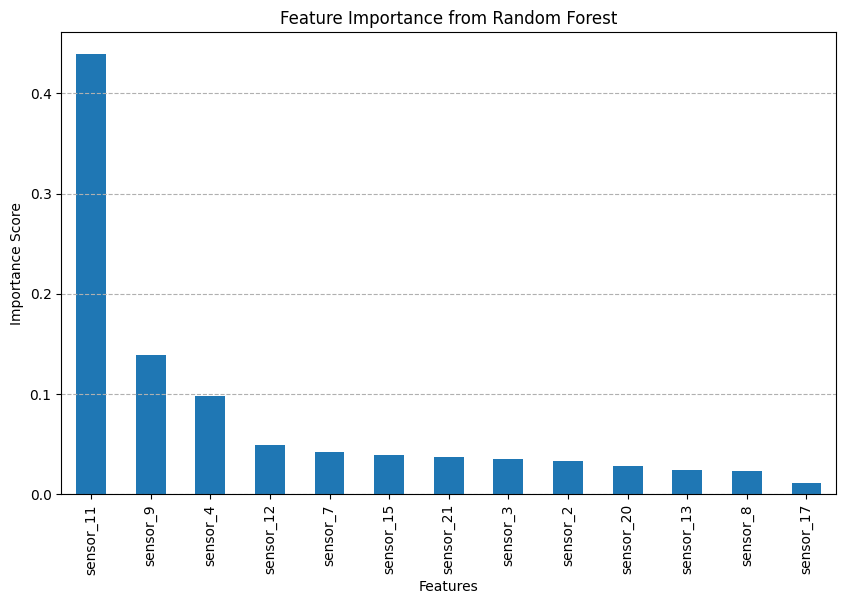

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# جدا کردن ویژگی‌ها (X) و متغیر هدف (y) از دیتافریم آموزشی
features = [col for col in train_df.columns if col not in ['unit_nr', 'cycle', 'RUL']]
X_train = train_df[features]
y_train = train_df['RUL']

# ساخت و آموزش مدل Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# استخراج و نمایش اهمیت ویژگی‌ها
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

print("اهمیت ویژگی‌ها بر اساس مدل Random Forest:")
print(importances)

# رسم نمودار میله‌ای برای نمایش بصری
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.grid(axis='y', linestyle='--')
plt.show()

### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# انتخاب ستون‌های ویژگی که باید نرمال‌سازی شوند
feature_cols = [col for col in train_df.columns if 'sensor' in col]

scaler = MinMaxScaler()

scaler.fit(train_df[feature_cols])

train_df[feature_cols] = scaler.transform(train_df[feature_cols])
test_df[feature_cols] = scaler.transform(test_df[feature_cols])

print("نمونه‌ای از داده‌های آموزشی پس از نرمال‌سازی:")
display(train_df.head())

نمونه‌ای از داده‌های آموزشی پس از نرمال‌سازی:


,unit_nr,cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.363986,0.333333,0.713178,0.724662,191
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.411312,0.333333,0.666667,0.731014,190
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.357445,0.166667,0.627907,0.621375,189
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.166603,0.333333,0.573643,0.662386,188
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.402078,0.416667,0.589147,0.704502,187


### Sliding Window and RUL labeling

In [ ]:
# تعیین اندازه پنجره
sequence_length = 30

# لیست‌هایی برای ذخیره پنجره‌ها و برچسب‌های نهایی
X_train_list = []
y_train_list = []

# انتخاب ستون‌های ویژگی
feature_cols = [col for col in train_df.columns if 'sensor' in col]

# حلقه برای پردازش هر موتور به صورت جداگانه
for unit_nr in train_df['unit_nr'].unique():
    # جدا کردن داده‌های مربوط به یک موتور
    engine_data = train_df[train_df['unit_nr'] == unit_nr]

    # استخراج ویژگی‌ها و برچسب‌ها
    features = engine_data[feature_cols].values
    labels = engine_data['RUL'].values

    # ایجاد پنجره‌ها
    num_windows = len(features) - sequence_length
    for i in range(num_windows):
        # استخراج پنجره ویژگی‌ها
        window = features[i : i + sequence_length]
        X_train_list.append(window)

        # استخراج برچسب مربوط به انتهای پنجره
        label = labels[i + sequence_length - 1]
        y_train_list.append(label)

# تبدیل لیست‌ها به آرایه‌های NumPy
X_train = np.array(X_train_list)
y_train = np.array(y_train_list)

print("شکل داده‌های ورودی (X_train):", X_train.shape)
print("شکل برچسب‌ها (y_train):", y_train.shape)

شکل داده‌های ورودی (X_train): (17631, 30, 13)
شکل برچسب‌ها (y_train): (17631,)


In [ ]:
# برش دادن مقادیر y_train به حداکثر 130
y_train = np.clip(y_train, 0, 130)

### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# آماده‌سازی داده‌های آزمون
X_test_list = []
y_test_list = []

for unit_nr in test_df['unit_nr'].unique():
    # جدا کردن داده‌های مربوط به یک موتور در مجموعه آزمون
    engine_data = test_df[test_df['unit_nr'] == unit_nr]
    features = engine_data[feature_cols].values

    # استخراج آخرین پنجره
    last_window = features[-sequence_length:]
    X_test_list.append(last_window)

    # استخراج RUL واقعی از rul_df
    # -1 چون ایندکس unit_nr از 1 شروع می‌شود ولی ایندکس rul_df از 0
    true_rul = rul_df.iloc[unit_nr - 1].values[0]
    y_test_list.append(true_rul)

X_test = np.array(X_test_list)
y_test = np.array(y_test_list)

# برش دادن مقادیر y_test نیز (برای سازگاری در ارزیابی)
y_test = np.clip(y_test, 0, 130)


#  تقسیم داده‌های آموزشی به آموزش و اعتبارسنجی

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)


print("شکل نهایی داده‌های آموزش:", X_train_final.shape, y_train_final.shape)
print("شکل نهایی داده‌های اعتبارسنجی:", X_val.shape, y_val.shape)
print("شکل نهایی داده‌های آزمون:", X_test.shape, y_test.shape)

شکل نهایی داده‌های آموزش: (12341, 30, 13) (12341,)
شکل نهایی داده‌های اعتبارسنجی: (5290, 30, 13) (5290,)
شکل نهایی داده‌های آزمون: (100, 30, 13) (100,)


## **LVL 2 - CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout

model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same',
           input_shape=(X_train_final.shape[1], X_train_final.shape[2])),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    GlobalAveragePooling1D(),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_cnn.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mean_absolute_error'])

model_cnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 30, 64)         │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,585 (139.00 KB)

 Trainable params: 35,585 (139.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn = model_cnn.fit(
    X_train_final, y_train_final,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

print("\nآموزش مدل CNN به پایان رسید.")

Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 4454.7183 - mean_absolute_error: 54.3129 - val_loss: 707.2765 - val_mean_absolute_error: 21.4680
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 759.3788 - mean_absolute_error: 22.1474 - val_loss: 597.9521 - val_mean_absolute_error: 19.5801
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 666.1277 - mean_absolute_error: 20.7585 - val_loss: 557.1396 - val_mean_absolute_error: 18.9726
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 626.0061 - mean_absolute_error: 20.0108 - val_loss: 531.5972 - val_mean_absolute_error: 18.2629
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 602.2166 - mean_absolute_error: 19.5173 - val_loss: 514.9207 - val_mean_absolute_error: 17.9158
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 584.3692 - mean_absolute_error: 19.0759 - val_loss: 544.5234 - val_mean_absolute_error: 18.0199
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 57

## **LVL 3 - LSTM**

In [ ]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train_final.shape[1], X_train_final.shape[2])),
    Dropout(0.2),

    LSTM(50, return_sequences=False),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(1)
])

optimizer_lstm = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm.compile(loss='mean_squared_error',
                   optimizer=optimizer_lstm,
                   metrics=['mean_absolute_error'])

model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 100)        │        45,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,129 (309.10 KB)

 Trainable params: 79,129 (309.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_lstm = model_lstm.fit(
    X_train_final, y_train_final,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

print("\nآموزش مدل LSTM به پایان رسید.")

Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 6095.3384 - mean_absolute_error: 66.4385 - val_loss: 1847.0699 - val_mean_absolute_error: 38.1859
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1956.3147 - mean_absolute_error: 38.9467 - val_loss: 1848.6086 - val_mean_absolute_error: 38.2724
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1935.3331 - mean_absolute_error: 38.6028 - val_loss: 1848.0010 - val_mean_absolute_error: 38.2523
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1930.1356 - mean_absolute_error: 38.7200 - val_loss: 1848.5483 - val_mean_absolute_error: 38.2709
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1942.6287 - mean_absolute_error: 38.8162 - val_loss: 1847.0968 - val_mean_absolute_error: 38.2036
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1926.7885 - mean_absolute_error: 38.5234 - val_loss: 1846.7942 - val_mean_absolute_error: 38.1920
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms

## **LVL 4 - Hyperparameter Tuning**

In [ ]:
!pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.6 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_hypermodel(hp):
    model = Sequential()

    #  تنظیم تعداد فیلترها در لایه اول
    hp_filters = hp.Int('filters', min_value=32, max_value=128, step=32) # 32, 64, 96, 128
    model.add(Conv1D(filters=hp_filters, kernel_size=3, activation='relu', padding='same',
                     input_shape=(X_train_final.shape[1], X_train_final.shape[2])))

    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(64, activation='relu'))

    #  تنظیم  Dropout
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1) # 0.1, 0.2, 0.3, 0.4, 0.5
    model.add(Dropout(hp_dropout))

    model.add(Dense(1))

    #  تنظیم نرخ یادگیری
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]) # 0.01, 0.001, 0.0001

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    return model

# ایجاد تیونر RandomSearch
tuner = kt.RandomSearch(
    build_hypermodel,
    objective='val_mean_absolute_error', # هدف: کمینه کردن MAE در مجموعه اعتبارسنجی
    max_trials=5,  # تعداد کل ترکیباتی که امتحان می‌شود
    executions_per_trial=1, # هر ترکیب چند بار اجرا شود
    directory='my_dir',
    project_name='hparam_tuning'
)

# نمایش خلاصه‌ای از فضای جستجو
tuner.search_space_summary()

# شروع جستجو
print("\nشروع جستجوی بهترین ابرپارامترها...")
tuner.search(X_train_final, y_train_final, epochs=10, validation_data=(X_val, y_val))

# دریافت بهترین پارامترها
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
جستجو به پایان رسید.
بهترین تعداد فیلترها: {best_hps.get('filters')}
بهترین نرخ Dropout: {best_hps.get('dropout')}
بهترین نرخ یادگیری: {best_hps.get('learning_rate')}
""")

Trial 5 Complete [00h 00m 27s]
val_mean_absolute_error: 17.45041275024414

Best val_mean_absolute_error So Far: 16.65687370300293
Total elapsed time: 00h 02m 22s

جستجو به پایان رسید.
بهترین تعداد فیلترها: 96
بهترین نرخ Dropout: 0.30000000000000004
بهترین نرخ یادگیری: 0.001



In [ ]:
import keras_tuner as kt

def build_hypermodel_v2(hp):
    model = Sequential()

    # 1. تنظیم تعداد فیلترها
    hp_filters = hp.Int('filters', min_value=32, max_value=128, step=32)
    model.add(Conv1D(filters=hp_filters, kernel_size=3, activation='relu', padding='same',
                     input_shape=(X_train_final.shape[1], X_train_final.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(64, activation='relu'))

    # 2. تنظیم نرخ Dropout
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout))

    model.add(Dense(1))

    # 3. تنظیم نرخ یادگیری
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # 4. (جدید) تنظیم نوع بهینه‌ساز
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])

    if hp_optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    return model

# ایجاد تیونر جدید
tuner_v2 = kt.RandomSearch(
    build_hypermodel_v2,
    objective='val_mean_absolute_error',
    max_trials=8, # تعداد را کمی بیشتر می‌کنیم چون پارامتر جدیدی اضافه شده
    executions_per_trial=1,
    directory='my_dir_v2', # یک پوشه جدید برای نتایج
    project_name='hparam_tuning_full'
)

# شروع جستجو
print("\nشروع جستجوی کامل‌تر...")
tuner_v2.search(X_train_final, y_train_final, epochs=10, validation_data=(X_val, y_val))

# دریافت بهترین پارامترها
best_hps_v2 = tuner_v2.get_best_hyperparameters(num_trials=1)[0]

print(f"""
جستجوی کامل‌تر به پایان رسید.
بهترین نوع بهینه‌ساز: {best_hps_v2.get('optimizer')}
بهترین تعداد فیلترها: {best_hps_v2.get('filters')}
بهترین نرخ Dropout: {best_hps_v2.get('dropout')}
بهترین نرخ یادگیری: {best_hps_v2.get('learning_rate')}
""")

Trial 8 Complete [00h 00m 26s]
val_mean_absolute_error: 12.47687816619873

Best val_mean_absolute_error So Far: 12.062032699584961
Total elapsed time: 00h 03m 22s

جستجوی کامل‌تر به پایان رسید.
بهترین نوع بهینه‌ساز: rmsprop
بهترین تعداد فیلترها: 96
بهترین نرخ Dropout: 0.4
بهترین نرخ یادگیری: 0.01



## **LVL 5 - CNN + LSTM**

In [ ]:
model_hybrid = Sequential([

    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same',
           input_shape=(X_train_final.shape[1], X_train_final.shape[2])),
    MaxPooling1D(pool_size=2),


    LSTM(100, return_sequences=False),
    Dropout(0.3),

    Dense(64, activation='relu'),


    Dense(1)
])


optimizer_hybrid = tf.keras.optimizers.Adam(learning_rate=0.001)
model_hybrid.compile(loss='mean_squared_error',
                     optimizer=optimizer_hybrid,
                     metrics=['mean_absolute_error'])

model_hybrid.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 30, 64)         │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,089 (293.32 KB)

 Trainable params: 75,089 (293.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_hybrid = model_hybrid.fit(
    X_train_final, y_train_final,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

print("\nآموزش مدل ترکیبی CNN+LSTM به پایان رسید.")

Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4919.3691 - mean_absolute_error: 58.8008 - val_loss: 1459.3545 - val_mean_absolute_error: 34.3497
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 790.9951 - mean_absolute_error: 22.9548 - val_loss: 466.0072 - val_mean_absolute_error: 17.4658
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 466.7952 - mean_absolute_error: 16.9781 - val_loss: 396.3636 - val_mean_absolute_error: 15.4444
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 410.6772 - mean_absolute_error: 15.7942 - val_loss: 317.1834 - val_mean_absolute_error: 13.9231
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 323.5400 - mean_absolute_error: 13.9116 - val_loss: 267.4174 - val_mean_absolute_error: 12.8272
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 285.9321 - mean_absolute_error: 12.9585 - val_loss: 243.8864 - val_mean_absolute_error: 11.8941
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 

## **LVL 5.2 - LSTM + CNN**

In [ ]:
model_hybrid_swapped = Sequential([

    LSTM(100, return_sequences=True, input_shape=(X_train_final.shape[1], X_train_final.shape[2])),


    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    GlobalAveragePooling1D(),

    Dropout(0.3),
    Dense(64, activation='relu'),


    Dense(1)
])

optimizer_swapped = tf.keras.optimizers.Adam(learning_rate=0.001)
model_hybrid_swapped.compile(loss='mean_squared_error',
                             optimizer=optimizer_swapped,
                             metrics=['mean_absolute_error'])

model_hybrid_swapped.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 100)        │        45,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 30, 64)         │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,089 (269.88 KB)

 Trainable params: 69,089 (269.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_hybrid_swapped = model_hybrid_swapped.fit(
    X_train_final, y_train_final,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

print("\nآموزش مدل ترکیبی LSTM+CNN به پایان رسید.")

Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 4320.1074 - mean_absolute_error: 54.3489 - val_loss: 1039.3269 - val_mean_absolute_error: 27.7210
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 948.9530 - mean_absolute_error: 25.0774 - val_loss: 648.7509 - val_mean_absolute_error: 20.4725
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 700.2833 - mean_absolute_error: 20.9211 - val_loss: 498.2067 - val_mean_absolute_error: 17.2028
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 521.7756 - mean_absolute_error: 17.8934 - val_loss: 437.0792 - val_mean_absolute_error: 16.2992
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 432.5637 - mean_absolute_error: 16.1980 - val_loss: 328.7956 - val_mean_absolute_error: 14.0865
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 386.0124 - mean_absolute_error: 15.1611 - val_loss: 378.3363 - val_mean_absolute_error: 15.2255
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss

## **LVL 6 - LSTM + ATTENTION**

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Attention
from tensorflow.keras.models import Model

# تعریف ورودی مدل
inputs = Input(shape=(X_train_final.shape[1], X_train_final.shape[2]))

lstm_out = LSTM(100, return_sequences=True)(inputs)

attention_out = Attention()([lstm_out, lstm_out])

lstm_final_out = LSTM(50)(attention_out)

dropout_out = Dropout(0.3)(lstm_final_out)
dense_out = Dense(64, activation='relu')(dropout_out)
output = Dense(1)(dense_out)

# ساخت مدل نهایی با تعریف ورودی‌ها و خروجی‌ها
model_attention = Model(inputs=inputs, outputs=output)


optimizer_attention = tf.keras.optimizers.Adam(learning_rate=0.001)
model_attention.compile(loss='mean_squared_error',
                        optimizer=optimizer_attention,
                        metrics=['mean_absolute_error'])

model_attention.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 30, 13)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 30, 100)   │     45,600 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 30, 100)   │          0 │ lstm_4[0][0],     │
│ (Attention)         │                   │            │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 50)        │     30,200 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 50)        │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      3,264 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         65 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 79,129 (309.10 KB)

 Trainable params: 79,129 (309.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_attention = model_attention.fit(
    X_train_final, y_train_final,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

print("\nآموزش مدل LSTM + Attention به پایان رسید.")

Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 5983.2651 - mean_absolute_error: 65.8253 - val_loss: 1847.2756 - val_mean_absolute_error: 38.2150
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1920.1246 - mean_absolute_error: 38.6022 - val_loss: 1851.9287 - val_mean_absolute_error: 38.3505
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1899.2831 - mean_absolute_error: 38.4383 - val_loss: 1848.5951 - val_mean_absolute_error: 38.2720
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1904.3170 - mean_absolute_error: 38.4845 - val_loss: 1847.8322 - val_mean_absolute_error: 38.1412
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1899.0242 - mean_absolute_error: 38.3423 - val_loss: 1847.2649 - val_mean_absolute_error: 38.1610
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1915.5560 - mean_absolute_error: 38.5095 - val_loss: 1851.5035 - val_mean_absolute_error: 38.3429
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/st

# ***B: Performance evaluation of models***

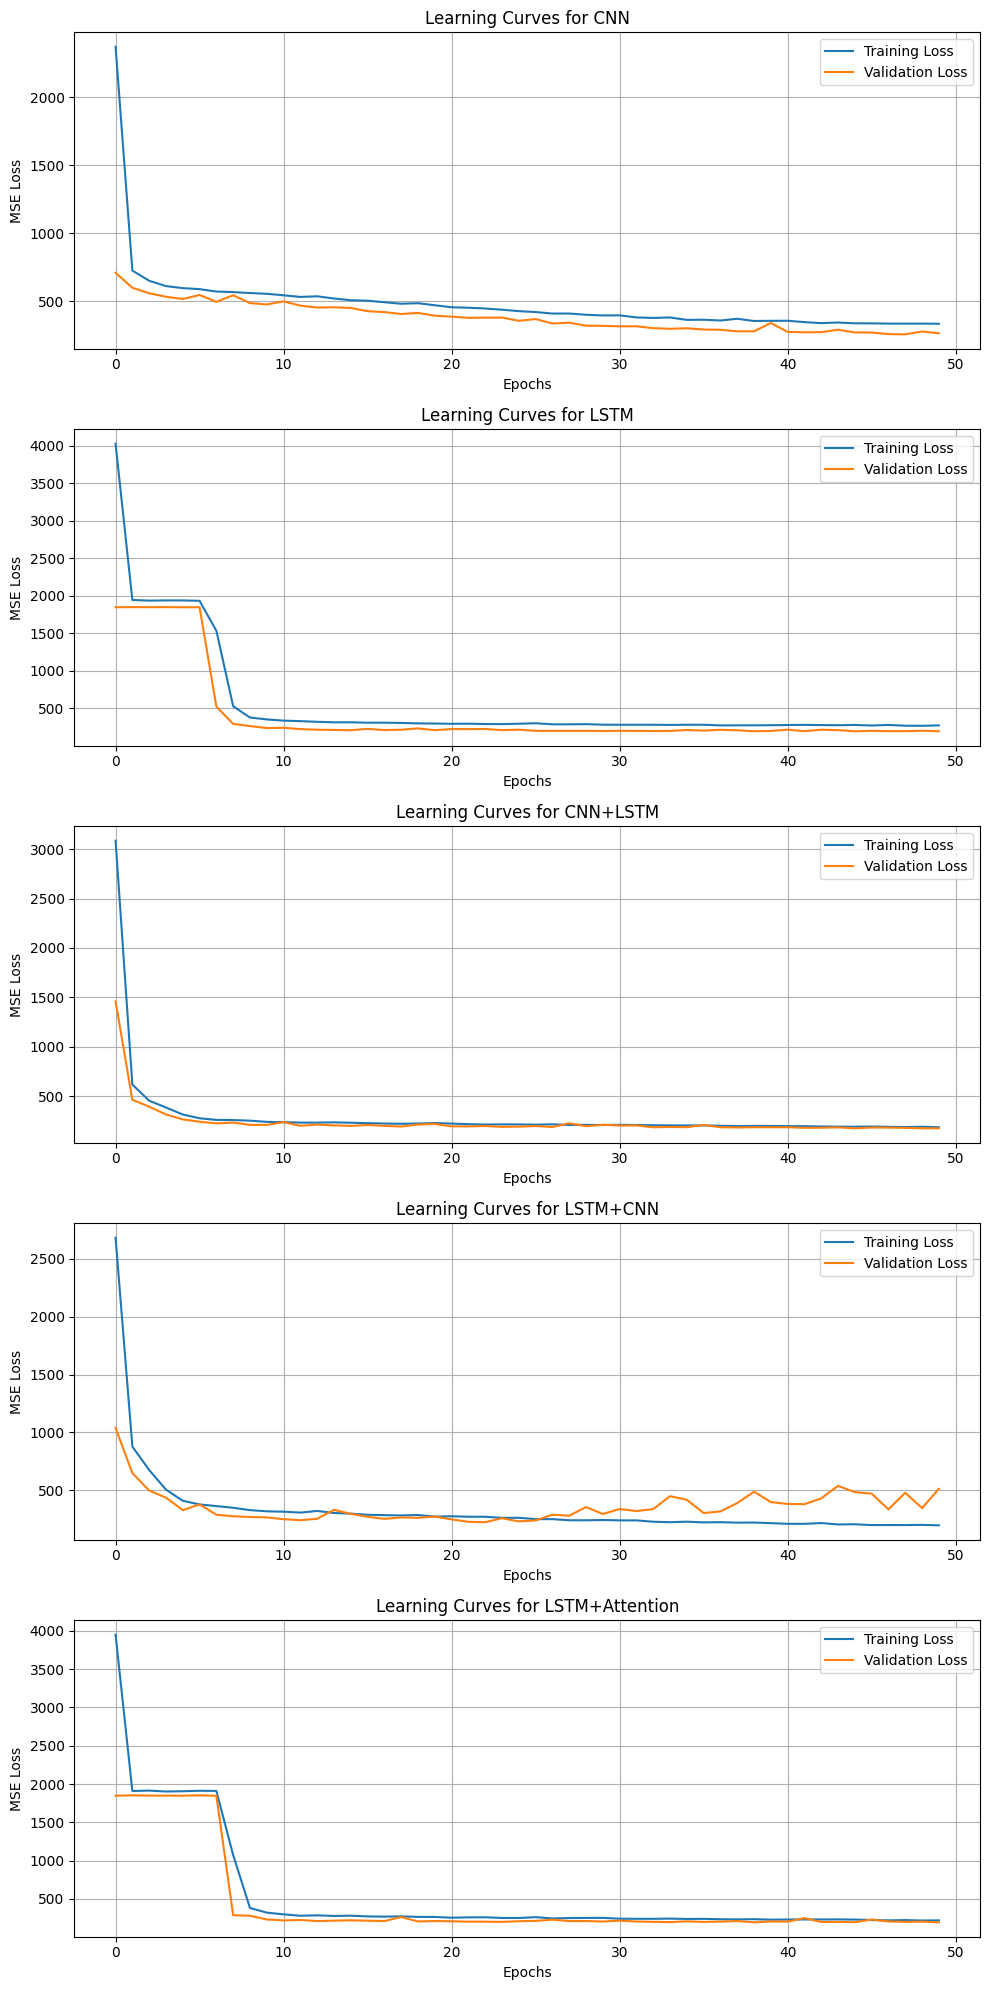

In [ ]:
import matplotlib.pyplot as plt

histories = {
    'CNN': history_cnn,
    'LSTM': history_lstm,
    'CNN+LSTM': history_hybrid,
    'LSTM+CNN': history_hybrid_swapped,
    'LSTM+Attention': history_attention
}

fig, axes = plt.subplots(5, 1, figsize=(10, 20))

axes = axes.flatten()


for i, (model_name, history) in enumerate(histories.items()):
    ax = axes[i]
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'Learning Curves for {model_name}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('MSE Loss')
    ax.legend()
    ax.grid(True)


if len(histories) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/tmp/ipython-input-41-2060725640.py:27: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


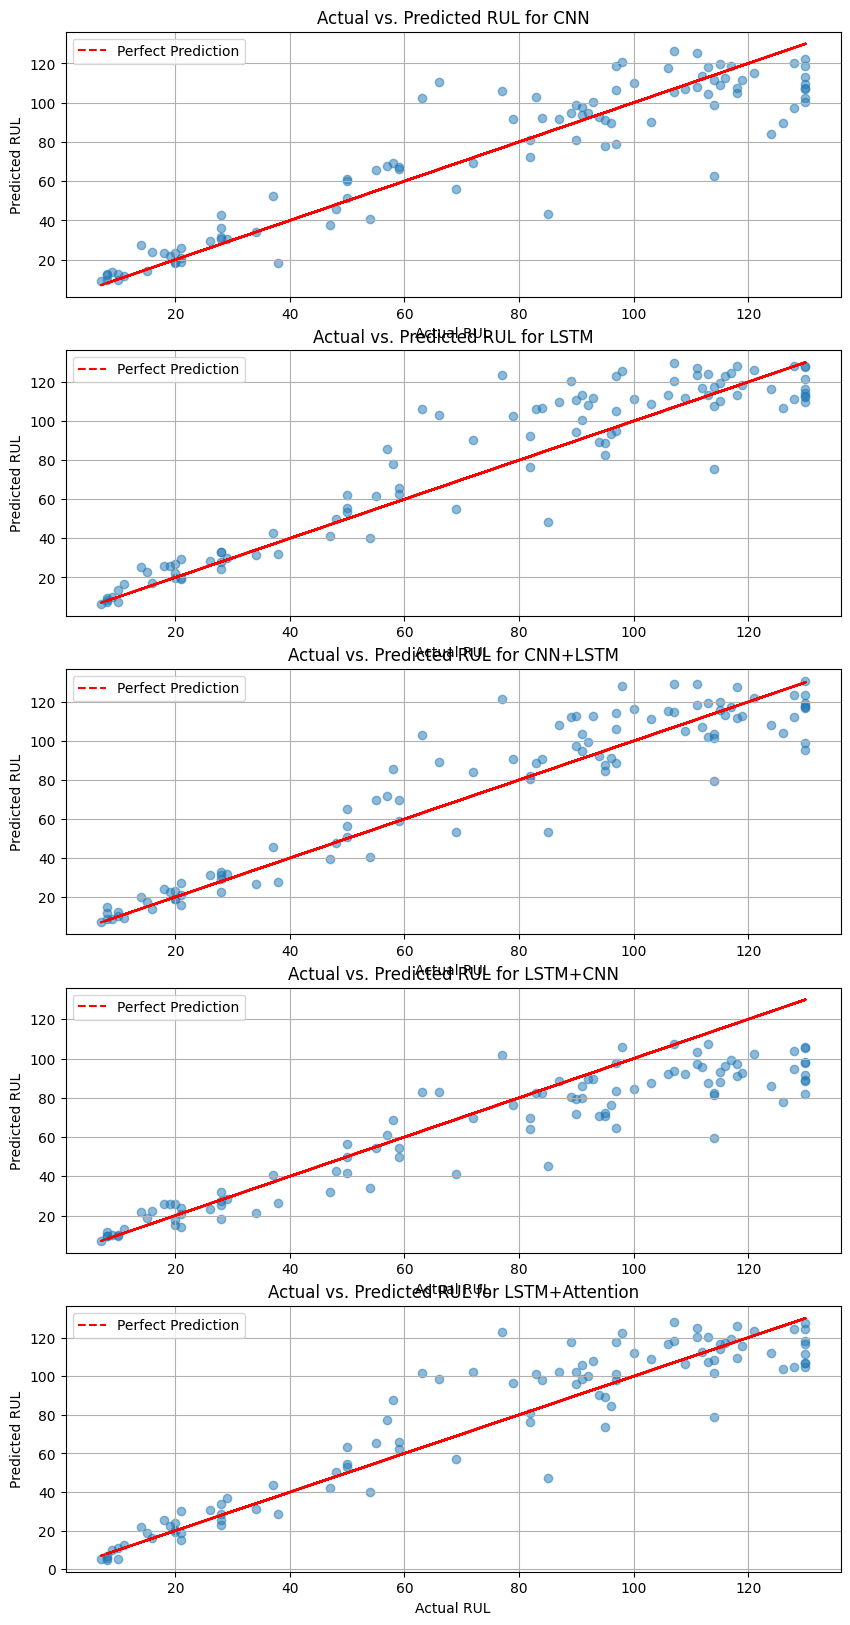

In [ ]:
models = {
    'CNN': model_cnn,
    'LSTM': model_lstm,
    'CNN+LSTM': model_hybrid,
    'LSTM+CNN': model_hybrid_swapped,
    'LSTM+Attention': model_attention
}

predictions = {}
for model_name, model in models.items():
    predictions[model_name] = model.predict(X_test).flatten()

plt.figure(figsize=(10, 20))
for i, (model_name, pred) in enumerate(predictions.items()):
    plt.subplot(5, 1, i + 1)
    plt.plot(y_test, y_test, 'r--', label='Perfect Prediction') # خط ایده آل
    plt.scatter(y_test, pred, alpha=0.5)
    plt.title(f'Actual vs. Predicted RUL for {model_name}')
    plt.xlabel('Actual RUL')
    plt.ylabel('Predicted RUL')
    plt.grid(True)
    plt.legend()

if len(models) < 6:
    plt.subplot(3, 2, 6).set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import numpy as np

model_names_list, rmse_list, mae_list, r2_list, mape_list = [], [], [], [], []


for model_name, pred in predictions.items():
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    mape = mean_absolute_percentage_error(y_test, pred)

    model_names_list.append(model_name)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)
    mape_list.append(mape)


results_df_full = pd.DataFrame({
    'Model': model_names_list,
    'RMSE': rmse_list,
    'MAE': mae_list,
    'MAPE': mape_list,
    'R-squared (R²)': r2_list
})

results_df_full = results_df_full.sort_values(by='RMSE', ascending=True)

print("مقایسه کامل معیارهای عملکرد:")
display(results_df_full)

مقایسه کامل معیارهای عملکرد:


,Model,RMSE,MAE,MAPE,R-squared (R²)
2,CNN+LSTM,13.733216,9.968085,0.156933,0.886066
4,LSTM+Attention,14.276223,10.393877,0.166015,0.876878
1,LSTM,14.804813,10.721585,0.170291,0.867592
0,CNN,15.274880,10.881884,0.177969,0.859050
3,LSTM+CNN,19.344744,14.414739,0.191633,0.773934


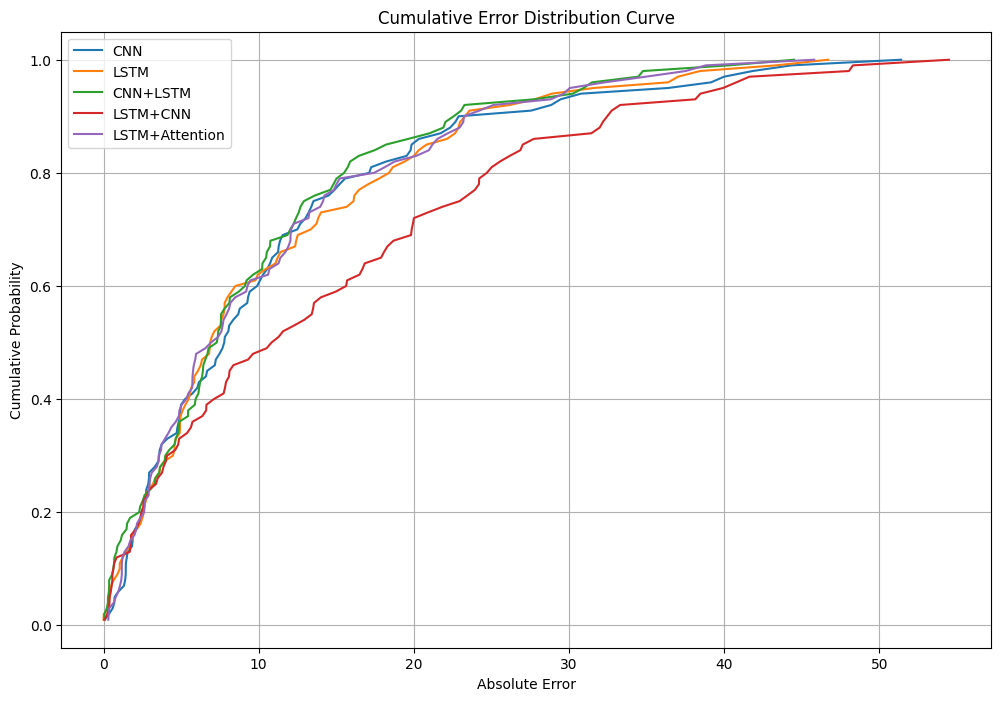

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for model_name, pred in predictions.items():
    # محاسبه خطای مطلق برای هر پیش‌بینی
    errors = np.abs(pred - y_test)

    # مرتب‌سازی خطاها
    sorted_errors = np.sort(errors)

    # محاسبه درصد تجمعی
    cumulative_prob = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)

    # رسم نمودار
    plt.plot(sorted_errors, cumulative_prob, label=model_name)

plt.title('Cumulative Error Distribution Curve')
plt.xlabel('Absolute Error')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()